In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../rbm_results-permutation.csv', index_col=0)

data['total_items_permutated'] = data['y'].str.split(',').str.len()
data.head()

,fold,metric,missing,value,y,total_items_permutated
0,0,permutations,set(),0.752887,"{0, 1}",2
1,0,permutations,set(),0.877598,"{0, 2}",2
2,0,permutations,set(),0.935335,"{0, 3}",2
3,0,permutations,set(),0.967667,"{0, 4}",2
4,0,permutations,set(),0.967667,"{0, 5}",2


In [2]:
df = data.groupby(['total_items_permutated'])['value'].agg(["mean", "std"])
df

,mean,std
total_items_permutated,,
2,0.896221,0.072671
3,0.816628,0.070165
4,0.750308,0.063234
5,0.690544,0.050106
6,0.633039,0.019455


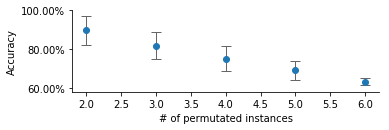

In [3]:
from itertools import combinations

plt.figure(figsize=(5.5, 1.5))

plt.errorbar(y=df['mean'], x=df.index, yerr=df['std'], fmt='o', ecolor='#666666', capsize=5, elinewidth=1, markeredgewidth=1)
plt.xlim([1.8, 6.2])
plt.ylim([.58, 1])
sns.despine();

import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 10})

plt.gca().set_xlabel('# of permutated instances')
plt.gca().set_ylabel('Accuracy')
plt.gca().set_yticklabels(['{:,.2%}'.format(x) for x in plt.gca().get_yticks()])

plt.gca().get_figure().savefig("permutations.pdf", bbox_inches='tight')